In [1]:
import pandas as pd

In [107]:
data = pd.read_excel('../../Downloads/INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls', skipinitialspace = True)

In [3]:
data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


In [4]:
extractedDepartment = data[['EmpDepartment','PerformanceRating']]

In [5]:
extractedDepartment.head()

,EmpDepartment,PerformanceRating
0,Sales,3
1,Sales,3
2,Sales,4
3,Human Resources,3
4,Sales,3


In [6]:
from collections import Counter
Counter(extractedDepartment.PerformanceRating)

Counter({3: 874, 4: 132, 2: 194})

In [7]:
def ratingByDepartment(department):
    salesDepartment = extractedDepartment[extractedDepartment['EmpDepartment'] == department]
    rating = []
    index = []
    
    for i in range(1,5):
        rating.append(salesDepartment[salesDepartment['PerformanceRating'] == i].shape[0])
    
    return rating    
    

In [8]:
Counter(extractedDepartment.EmpDepartment)

Counter({'Sales': 373,
         'Human Resources': 54,
         'Development': 361,
         'Data Science': 20,
         'Research & Development': 343,
         'Finance': 49})

In [9]:
departments= list(dict(Counter(extractedDepartment.EmpDepartment)))

In [10]:
departments

['Sales',
 'Human Resources',
 'Development',
 'Data Science',
 'Research & Development',
 'Finance']

In [11]:
print(ratingByDepartment("Development"))

[0, 13, 304, 44]


In [12]:
ratingByDepart = []
ratingList = []
for depart in departments:
    ratingByDepart.append(ratingByDepartment(depart))
    ratingList.append([1,2,3,4])

In [13]:
ratingList

[[1, 2, 3, 4],
 [1, 2, 3, 4],
 [1, 2, 3, 4],
 [1, 2, 3, 4],
 [1, 2, 3, 4],
 [1, 2, 3, 4]]

In [14]:
salesDepartment = extractedDepartment[extractedDepartment['EmpDepartment'] == 'Data Science']

In [15]:
salesDepartment.head()

,EmpDepartment,PerformanceRating
89,Data Science,3
107,Data Science,3
108,Data Science,3
120,Data Science,3
942,Data Science,3


In [16]:
ratingOne = salesDepartment[salesDepartment['PerformanceRating'] == 3].shape

In [17]:
ratingOne

(17, 2)

In [18]:
rating = []
index = []

In [19]:
for i in range(1,5):
    rating.append(salesDepartment[salesDepartment['PerformanceRating'] == i].shape[0])
    index.append(i)

In [22]:
print(index,rating)
print((1*rating[0]+2*rating[1]+3*rating[2]+4*rating[3])/np.sum(rating))

[1, 2, 3, 4] [0, 1, 17, 2]
3.05


In [23]:
import numpy as np
print(np.sum(rating)/4)

5.0


In [24]:
import matplotlib.pyplot as plt

([<matplotlib.patches.Wedge at 0x7f930fac9610>,
 [Text(1.1, 0.0, '1'),
  Text(1.0864571742518743, 0.1720779140872905, '2'),
  Text(-1.0864571883490803, 0.17207782508101088, '3'),
  Text(1.04616222202798, -0.3399185272995272, '4')])

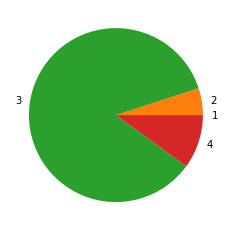

In [25]:
plt.pie(rating,labels=['1','2','3','4'])

In [26]:
ratingByDepart

[[0, 87, 251, 35],
 [0, 10, 38, 6],
 [0, 13, 304, 44],
 [0, 1, 17, 2],
 [0, 68, 234, 41],
 [0, 15, 30, 4]]

In [27]:
ratingByDepart[0]

[0, 87, 251, 35]

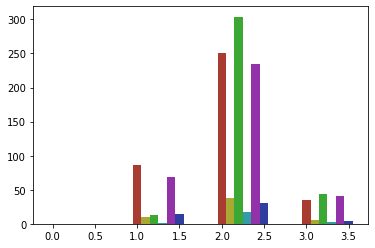

In [55]:
import numpy as np
import matplotlib.pyplot as plt

X = np.arange(4)
plt.bar(X + 0.00, ratingByDepart[0], color = '#a83c32', width = 0.1)
plt.bar(X + 0.1, ratingByDepart[1], color = '#a8a832', width = 0.1)
plt.bar(X + 0.2, ratingByDepart[2], color = '#3aa832', width = 0.1)
plt.bar(X + 0.3, ratingByDepart[3], color = '#329ca8', width = 0.1)
plt.bar(X + 0.4, ratingByDepart[4], color = '#9232a8', width = 0.1)
plt.bar(X + 0.5, ratingByDepart[5], color = '#303f9f', width = 0.1)

plt.show()

In [84]:
def mean(ratebydepart):
    ratingAvg = []
    sums = 0
    for i in range(0,len(departments)):
        for j in range(0,4):
            sums = sums + ratebydepart[i][j]*(j+1)
        ratingAvg.append(sums/sum(ratebydepart[i]))
        sums = 0
    return ratingAvg

In [86]:
ratingAvg  = mean(ratingByDepart)
print(ratingAvg)

[2.8605898123324396, 2.925925925925926, 3.085872576177285, 3.05, 2.9212827988338192, 2.7755102040816326]


([0, 1, 2, 3, 4, 5], <a list of 6 Text xticklabel objects>)

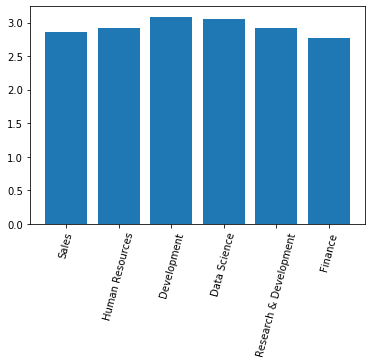

In [95]:
plt.bar(departments, ratingAvg)
plt.xticks(rotation = 75)

([<matplotlib.patches.Wedge at 0x7f930dc369d0>,
 [Text(1.0670284036740858, 0.26730204966055265, 'Sales'),
  Text(0.7038157157156114, 0.8453658606258724, 'Human Resources'),
  Text(-0.7961698932653047, 0.7590214101446107, 'Development'),
  Text(-0.3559370884980132, -1.040821208965093, 'Data Science'),
  Text(0.8810395310086412, -0.6586116798236074, 'Research & Development'),
  Text(1.0901108924353735, -0.14716739514496255, 'Finance')])

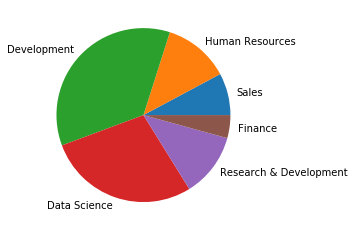

In [103]:
plt.pie([i**20 for i in ratingAvg], labels=departments)

<BarContainer object of 3 artists>

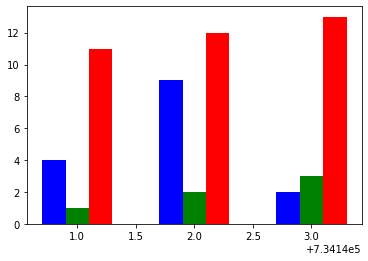

In [208]:


x = [
    datetime.datetime(2011, 1, 4, 0, 0),
    datetime.datetime(2011, 1, 5, 0, 0),
    datetime.datetime(2011, 1, 6, 0, 0)
]
x = date2num(x)

y = [4, 9, 2]
z = [1, 2, 3]
k = [11, 12, 13]

ax = plt.subplot(111)
ax.bar(x-0.2, y, width=0.2, color='b', align='center')
ax.bar(x, z, width=0.2, color='g', align='center')
ax.bar(x+0.2, k, width=0.2, color='r', align='center')
# ax.xaxis_date()


In [203]:
x

array([734141., 734142., 734143.])

<BarContainer object of 4 artists>

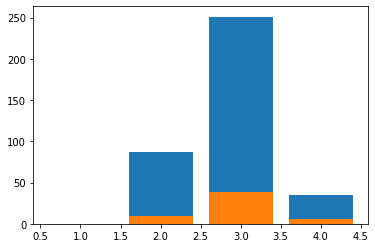

In [167]:
ax = plt.subplot(111)
ax.bar(index,ratingByDepart[0])
ax.bar(index,ratingByDepart[1])

In [110]:

import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [120]:
data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


In [122]:
from sklearn.preprocessing import LabelEncoder

In [126]:
data.shape

(1200, 28)

In [137]:
X = data.iloc[:,1:-1]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
X.head()
colm = []
for col in X.columns:
    colm.append(col)

In [140]:
print(colm)

['Age', 'Gender', 'EducationBackground', 'MaritalStatus', 'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency', 'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction', 'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel', 'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime', 'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction', 'TotalWorkExperienceInYears', 'TrainingTimesLastYear', 'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition']


In [149]:
le = []
i= 0
for col in colm:
    labelEncoder = LabelEncoder()
    X[col] = labelEncoder.fit_transform(X[col].astype(str))
    i += 1
    print(col)

Age
Gender
EducationBackground
MaritalStatus
EmpDepartment
EmpJobRole
BusinessTravelFrequency
DistanceFromHome
EmpEducationLevel
EmpEnvironmentSatisfaction
EmpHourlyRate
EmpJobInvolvement
EmpJobLevel
EmpJobSatisfaction
NumCompaniesWorked
OverTime
EmpLastSalaryHikePercent
EmpRelationshipSatisfaction
TotalWorkExperienceInYears
TrainingTimesLastYear
EmpWorkLifeBalance
ExperienceYearsAtThisCompany
ExperienceYearsInCurrentRole
YearsSinceLastPromotion
YearsWithCurrManager
Attrition


In [153]:
data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


In [159]:
#apply SelectKBest class to extract top 3 best features
bestfeatures = SelectKBest(score_func=chi2, k=3)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(3,'Score'))  #print 10 best features

                           Specs       Score
23       YearsSinceLastPromotion  484.491668
9     EmpEnvironmentSatisfaction  175.203015
22  ExperienceYearsInCurrentRole  134.668425
